In [8]:
#%load_ext autoreload
#%autoreload 2
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
from ps3 import *

def sort_4(center):
    ans=[]
    if center.shape[0]!=4:
        return None
    for tl in center:
        for bl in center:
            for tr in center:
                for br in center:
                    topleft = tl[0]<tr[0] and tl[1]<bl[1] #and tl[1]<br[1] and tl[0]<br[0]
                    botleft = bl[0]<br[0] and bl[1]>tl[1] #and bl[1]>tr[1] and bl[0]<tr[0] 
                    topright= tr[0]>tl[0] and tr[1]<br[1] #and tr[0]>bl[0] and tr[1]<bl[1] 
                    botright= br[0]>bl[0] and br[1]>tr[1] #and br[1]>tl[1] br[0]>tl[0] and
                    if (topleft and botleft and topright and botright):
                        ans.append((tl[0],tl[1]))
                        ans.append((bl[0],bl[1]))
                        ans.append((tr[0],tr[1]))
                        ans.append((br[0],br[1]))
                        return ans
    return None


img=cv2.imread('input_images/ps3-3-b_base.jpg')
#img=cv2.imread('input_images/ps3-2-a_base.jpg')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# find Harris corners
gray = cv2.medianBlur(gray,7)
ksize = 5
sigma = 6
gray = cv2.GaussianBlur(gray, (ksize, ksize), sigma, sigma)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04) #blocksize, sobel size, alpha 
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.1*dst.max(),255,0) # value=max if > 0.01*max
#plt.imshow(dst)
#plt.show()
all_pts=[]
for x in range(dst.shape[1]):
    for y in range(dst.shape[0]):
        if dst[y][x]!=0:
            all_pts.append((x,y))
all_pts=np.array(all_pts)
all_pts=np.float32(all_pts) #kmeans can only pass float32
#print all_pts.shape
            
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER , 10, 1.0) 
ret,label,center=cv2.kmeans(all_pts,4,criteria,10,cv2.KMEANS_RANDOM_CENTERS) # 4 is num of cluster, 10 is attempts
# Now separate the data, Note the flatten()
#print center.shape
#print sort_4(center)
#print center
#print A,B
center=np.int32(center)
print center


[[119 131]
 [866 117]
 [ 67 468]
 [910 458]]


In [42]:
%load_ext autoreload
%autoreload 2
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
from ps3 import *

imageA=cv2.imread('input_images/img-3-a-1.png')
imageB=cv2.imread('input_images/ps3-3-b_base.jpg')
src_points=get_corners_list(imageA)
dst_points=find_markers(imageB)
print dst_points

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[(119, 131), (67, 468), (866, 117), (910, 458)]


In [28]:
ctr=np.array([[1,1],[2,2]])
#ctr=[[1,1],[2,2]]
for i in ctr:
    for j in ctr:
        print i is j
        print i==j

False
[ True  True]
False
[False False]
False
[False False]
False
[ True  True]


In [43]:
src_points=get_corners_list(imageA)
dst_points=find_markers(imageB)

homography=find_four_point_transform(src_points, dst_points)
for i in range(4):
    ans=np.dot(homography,np.array([src_points[i][0],src_points[i][1],1]))
    ans=ans/ans[2]
    print ans
    print dst_points[i]

[119.00000121 130.99999944   1.        ]
(119, 131)
[ 66.99999876 468.00000001   1.        ]
(67, 468)
[865.99999992 117.00000001   1.        ]
(866, 117)
[910.0000001  457.99999999   1.        ]
(910, 458)


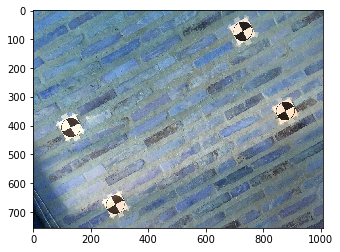

None


In [119]:
#%load_ext autoreload
#%autoreload 2
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
from ps3 import *

def sort_4(center):
    ans=[]
    if center.shape[0]!=4:
        return None
    for tl in center:
        for bl in center:
            for tr in center:
                for br in center:
                    topleft = tl[0]<tr[0] and tl[1]<bl[1] #and tl[1]<br[1] and tl[0]<br[0]
                    botleft = bl[0]<br[0] and bl[1]>tl[1] #and bl[1]>tr[1] and bl[0]<tr[0] 
                    topright= tr[0]>tl[0] and tr[1]<br[1] #and tr[0]>bl[0] and tr[1]<bl[1] 
                    botright= br[0]>bl[0] and br[1]>tr[1] #and br[1]>tl[1] br[0]>tl[0] and
                    if (topleft and botleft and topright and botright):
                        ans.append((tl[0],tl[1]))
                        ans.append((bl[0],bl[1]))
                        ans.append((tr[0],tr[1]))
                        ans.append((br[0],br[1]))
                        return ans
    return None


img=cv2.imread('input_images/test_images/rectangle_wall_noisy_gaussian.png')
img=cv2.imread('input_images/test_images/rectangle_wall_noisy.png')
img=cv2.imread('input_images/test_images/rectangle_wall.png')
img=cv2.imread('input_images/ps3-3-c_base.jpg')
plt.imshow(img)
plt.show()
print find_markers(img)